In [1]:
# Photometry
# REFERENCE : 
# - PHOTOMETRY https://photutils.readthedocs.io/en/stable/getting_started.html
# - WRITING TABLES https://docs.astropy.org/en/stable/io/ascii/write.html

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import photutils


In [7]:
print('Checking aperture photometry settings by single plot')
#PATH = '/work/chuck/jortuno/Observation_Laboratory_Course/20190823/Red_images'
PATH = '/work/chuck/chen/obs'

img = f'{PATH}/20190822/reduced/light_ab_and-0018V5.fit'
hdul = fits.open(img)
hdul.info()
hdul[0].header 
#print('filter',hdul[0].header['FILTER'])
#print('midpoint time',hdul[0].header['JD-HELIO'])
image, header = fits.getdata(img,header=True)
header

Checking aperture photometry settings by single plot
Filename: /work/chuck/chen/obs/20190822/reduced/light_ab_and-0018V5.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   (2749, 2199)   float64   


SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2749                                                  
NAXIS2  =                 2199                                                  
DATE-OBS= '2019-08-22T20:29:49' /YYYY-MM-DDThh:mm:ss observation start, UT      
EXPTIME =   10.000000000000000 /Exposure time in seconds                        
EXPOSURE=   10.000000000000000 /Exposure time in seconds                        
SET-TEMP=  -5.0000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -4.9600000000000000 /CCD temperature at start of exposure in C       
XPIXSZ  =   4.5400000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   4.5400000000000000 /Pixel Height in microns (after binning)         
XBINNING=                   

In [3]:
from photutils import DAOStarFinder
from astropy.stats import mad_std
bkg_sigma = mad_std(image)  
#daofind = DAOStarFinder(fwhm=10., threshold=500)#5.*bkg_sigma)  
daofind = DAOStarFinder(fwhm=20., threshold=5.*bkg_sigma)  
sources = daofind(image)  
sources['JD-HELIO'] = header['JD-HELIO']
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)  

#from astropy.io import ascii
#ascii.write(sources, 'values.dat', overwrite=True)

 id xcentroid ycentroid sharpness  ...    flux       mag       JD-HELIO
--- --------- --------- ---------- ... --------- ------------ ---------
  1 2038.9683 18.261184 0.66933517 ... 2.2306223  -0.87106509 2458718.4
  2 2469.6031  53.11988 0.30204121 ... 3.0179522   -1.1992809 2458718.4
  3 1555.9587 242.16229 0.36890077 ... 33.138668   -3.8008376 2458718.4
  4 1237.6151 258.00117 0.59629015 ... 1.5671869  -0.48780197 2458718.4
  5 843.20732  288.9724 0.27103691 ... 1.7410603  -0.60203455 2458718.4
  6 279.38078 290.22379 0.64271798 ... 1.1343243  -0.13684312 2458718.4
  7 1773.2926 296.40472 0.34947129 ... 1.5656953  -0.48676811 2458718.4
  8 1797.6057 302.47864 0.29691563 ...  1.787684  -0.63072688 2458718.4
  9 1960.2207 304.09286 0.62731685 ... 5.5035883   -1.8516148 2458718.4
 10 2194.2805 390.28646 0.73253815 ... 1.0405008 -0.043106056 2458718.4
...       ...       ...        ... ...       ...          ...       ...
 35 1407.3732   1875.31 0.47203472 ... 332.83227   -6.3055636 24

In [4]:
from photutils import aperture_photometry, CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  
apertures = CircularAperture(positions, r=4.)  
phot_table = aperture_photometry(image, apertures)  
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)  



 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 2038.9683 18.261184   -20278.824
  2 2469.6031  53.11988   -18238.839
  3 1555.9587 242.16229    68658.049
  4 1237.6151 258.00117   -25253.753
  5 843.20732  288.9724   -32413.263
  6 279.38078 290.22379   -33777.989
  7 1773.2926 296.40472   -27415.417
  8 1797.6057 302.47864   -26998.556
  9 1960.2207 304.09286    -10680.39
 10 2194.2805 390.28646   -23616.362
...       ...       ...          ...
 36 1974.2484 1900.9319   -29748.605
 37 2168.7712   1948.09   -28417.581
 38 2375.2805 1948.0648    -30139.04
 39 654.84784 1957.5539    395587.62
 40 264.53939 1960.1994   -24096.856
 41 1713.4118 1980.5984   -28273.416
 42 2445.8153  2029.413   -34989.724
 43 1324.5261 2109.7389   -27669.202
 44 768.56165 2146.6843   -13547.746
 45 960.45121 2173.3163   -28020.196
Length = 45 rows


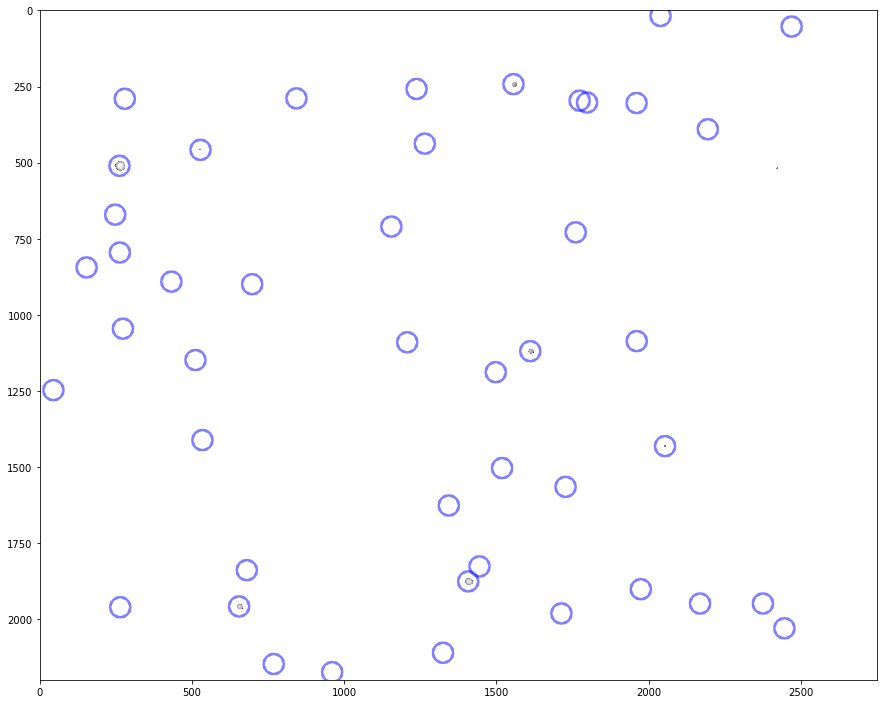

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.rcParams['figure.figsize'] = [15, 15]

plt.imshow(image, cmap='gray', norm=LogNorm())
#plt.imshow(image, cmap='gray_r', origin='lower')
apertures.plot(color='blue',lw=20, alpha=0.5)